# 2016 US Bike Share Activity Snapshot

## Table of Contents
- [Introduction](#intro)
- [Posing Questions](#pose_questions)
- [Data Collection and Wrangling](#wrangling)
  - [Condensing the Trip Data](#condensing)
- [Exploratory Data Analysis](#eda)
  - [Statistics](#statistics)
  - [Visualizations](#visualizations)
- [Performing Your Own Analysis](#eda_continued)
- [Conclusions](#conclusions)

<a id='intro'></a>
## Introduction

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles for short trips, typically 30 minutes or less. Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will perform an exploratory analysis on data provided by [Motivate](https://www.motivateco.com/), a bike-share system provider for many major cities in the United States. You will compare the system usage between three large cities: New York City, Chicago, and Washington, DC. You will also see if there are any differences within each system for those users that are registered, regular users and those users that are short-term, casual users.

<a id='pose_questions'></a>
## Posing Questions

Before looking at the bike sharing data, you should start by asking questions you might want to understand about the bike share data. Consider, for example, if you were working for Motivate. What kinds of information would you want to know about in order to make smarter business decisions? If you were a user of the bike-share service, what factors might influence how you would want to use the service?

**Question 1**: Write at least two questions related to bike sharing that you think could be answered by data.

**Answers**: 

**If I was working for Motivate, I would ask:**
1. What are the cities where we expect the bike-sharing system to work? I take into consideration the population number, the means of transport existed and distance between important service locations in the given city.
2. How many bikes must be available at the docks for each city, to ensure continuous service and to not make more bikes available than necessary? 
3. Would it be profitable to offer a lower trip price to the registered users in a given city?
4. What is the appropriate time to offer promotions?

**If I was a user of the bike-share service, I would ask:**
5. Do the docks well cover the city, where the use of the bike becomes more comfortable than the use of competitive means of transport.
6. Can I return the bike to any dock? 

<a id='wrangling'></a>
## Data Collection and Wrangling

Now it's time to collect and explore our data. In this project, we will focus on the record of individual trips taken in 2016 from our selected cities: New York City, Chicago, and Washington, DC. Each of these cities has a page where we can freely download the trip data.:

- New York City (Citi Bike): [Link](https://www.citibikenyc.com/system-data)
- Chicago (Divvy): [Link](https://www.divvybikes.com/system-data)
- Washington, DC (Capital Bikeshare): [Link](https://www.capitalbikeshare.com/system-data)

If you visit these pages, you will notice that each city has a different way of delivering its data. Chicago updates with new data twice a year, Washington DC is quarterly, and New York City is monthly. **However, you do not need to download the data yourself.** The data has already been collected for you in the `/data/` folder of the project files. While the original data for 2016 is spread among multiple files for each city, the files in the `/data/` folder collect all of the trip data for the year into one file per city. Some data wrangling of inconsistencies in timestamp format within each city has already been performed for you. In addition, a random 2% sample of the original data is taken to make the exploration more manageable. 

**Question 2**: However, there is still a lot of data for us to investigate, so it's a good idea to start off by looking at one entry from each of the cities we're going to analyze. Run the first code cell below to load some packages and functions that you'll be using in your analysis. Then, complete the second code cell to print out the first trip recorded from each of the cities (the second line of each data file).

In [2]:
## import all necessary packages and functions.
import csv # read and write csv files
from datetime import datetime # operations to parse dates
from pprint import pprint # use to print data structures like dictionaries in
                          # a nicer way than the base print function.

In [3]:
def print_first_point(filename):
    """
    This function prints and returns the first data point (second row) from
    a csv file that includes a header row.
    """
    # print city name for reference
    city = filename.split('-')[0].split('/')[-1]
    print('\nCity: {}'.format(city))
    
    with open(filename, 'r') as f_in:
        ## TODO: Use the csv library to set up a DictReader object. ##
        ## see https://docs.python.org/3/library/csv.html           ##

        trip_reader = csv.DictReader(f_in)
        
        ## TODO: Use a function on the DictReader object to read the     ##
        ## first trip from the data file and store it in a variable.     ##
        ## see https://docs.python.org/3/library/csv.html#reader-objects ##
      
        first_trip = trip_reader.__next__()
        
        ## TODO: Use the pprint library to print the first trip. ##
        ## see https://docs.python.org/3/library/pprint.html     ##
        # print(first_trip)
        pprint(first_trip)
    # output city name and first trip for later testing
    return (city, first_trip)

data_files = ['./data/NYC-CitiBike-2016.csv',
              './data/Chicago-Divvy-2016.csv',
              './data/Washington-CapitalBikeshare-2016.csv',]

 
# print the first trip from each file, store in dictionary
example_trips = {}
for data_file in data_files:
    city, first_trip = print_first_point(data_file)
    example_trips[city] = first_trip
    


City: NYC
OrderedDict([('tripduration', '839'),
             ('starttime', '1/1/2016 00:09:55'),
             ('stoptime', '1/1/2016 00:23:54'),
             ('start station id', '532'),
             ('start station name', 'S 5 Pl & S 4 St'),
             ('start station latitude', '40.710451'),
             ('start station longitude', '-73.960876'),
             ('end station id', '401'),
             ('end station name', 'Allen St & Rivington St'),
             ('end station latitude', '40.72019576'),
             ('end station longitude', '-73.98997825'),
             ('bikeid', '17109'),
             ('usertype', 'Customer'),
             ('birth year', ''),
             ('gender', '0')])

City: Chicago
OrderedDict([('trip_id', '9080545'),
             ('starttime', '3/31/2016 23:30'),
             ('stoptime', '3/31/2016 23:46'),
             ('bikeid', '2295'),
             ('tripduration', '926'),
             ('from_station_id', '156'),
             ('from_station_name', 'Clar

If everything has been filled out correctly, you should see below the printout of each city name (which has been parsed from the data file name) that the first trip has been parsed in the form of a dictionary. When you set up a `DictReader` object, the first row of the data file is normally interpreted as column names. Every other row in the data file will use those column names as keys, as a dictionary is generated for each row.

This will be useful since we can refer to quantities by an easily-understandable label instead of just a numeric index. For example, if we have a trip stored in the variable `row`, then we would rather get the trip duration from `row['duration']` instead of `row[0]`.

<a id='condensing'></a>
### Condensing the Trip Data

It should also be observable from the above printout that each city provides different information. Even where the information is the same, the column names and formats are sometimes different. To make things as simple as possible when we get to the actual exploration, we should trim and clean the data. Cleaning the data makes sure that the data formats across the cities are consistent, while trimming focuses only on the parts of the data we are most interested in to make the exploration easier to work with.

You will generate new data files with five values of interest for each trip: trip duration, starting month, starting hour, day of the week, and user type. Each of these may require additional wrangling depending on the city:

- **Duration**: This has been given to us in seconds (New York, Chicago) or milliseconds (Washington). A more natural unit of analysis will be if all the trip durations are given in terms of minutes.
- **Month**, **Hour**, **Day of Week**: Ridership volume is likely to change based on the season, time of day, and whether it is a weekday or weekend. Use the start time of the trip to obtain these values. The New York City data includes the seconds in their timestamps, while Washington and Chicago do not. The [`datetime`](https://docs.python.org/3/library/datetime.html) package will be very useful here to make the needed conversions.
- **User Type**: It is possible that users who are subscribed to a bike-share system will have different patterns of use compared to users who only have temporary passes. Washington divides its users into two types: 'Registered' for users with annual, monthly, and other longer-term subscriptions, and 'Casual', for users with 24-hour, 3-day, and other short-term passes. The New York and Chicago data uses 'Subscriber' and 'Customer' for these groups, respectively. For consistency, you will convert the Washington labels to match the other two.


**Question 3a**: Complete the helper functions in the code cells below to address each of the cleaning tasks described above.

In [4]:
def duration_in_mins(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the trip duration in units of minutes.
    
    Remember that Washington is in terms of milliseconds while Chicago and NYC
    are in terms of seconds. 
    
    HINT: The csv module reads in all of the data as strings, including numeric
    values. You will need a function to convert the strings into an appropriate
    numeric type when making your transformations.
    see https://docs.python.org/3/library/functions.html
    """
    if city =='Washington':
        # 1 sec. = 1000 ms
        # 1 min. = 1000 *60 ms = 60000 ms
        # I rounded the duration as in tests dict
        duration = round(int(datum['Duration (ms)'])/60000,4)
    else:
        # 1 min. = 60 s 
        duration = round(int(datum['tripduration'])/60,4)
    
    return duration
# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 13.9833,
         'Chicago': 15.4333,
         'Washington': 7.1231}

for city in tests:
    assert abs(duration_in_mins(example_trips[city], city) - tests[city]) <.001



In [5]:
def time_of_trip(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the month, hour, and day of the week in
    which the trip was made.
    
    Remember that NYC includes seconds, while Washington and Chicago do not.
    
    HINT: You should use the datetime module to parse the original date
    strings into a format that is useful for extracting the desired information.
    see https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior
    """
    # YOUR CODE HEREY
    if city == 'NYC':
        # strptime datetime function takes 2 arguments, date string and format string
        d = datetime.strptime(datum['starttime'],'%m/%d/%Y %H:%M:%S')
        month = d.month
        hour = d.hour
        # to extract Weekday as locale’s full name, use %A as a string format when calling strftime.
        day_of_week = d.strftime("%A")
        ## start_id and end_id are used to answer to question 6.4 and 6.5
        #start_id = datum['start station id']
        #end_id = datum['end station id']


    elif city =='Washington':
        d = datetime.strptime(datum['Start date'],'%m/%d/%Y %H:%M')
        month = d.month
        hour = d.hour
        day_of_week = d.strftime("%A") 
        ## start_id and end_id are used to answer to question 6.4 and 6.5
        #start_id = datum['Start station number']
        #end_id = datum['End station number']
 

    else:
        d = datetime.strptime(datum['starttime'],'%m/%d/%Y %H:%M')
        month = d.month
        hour = d.hour
        day_of_week = d.strftime("%A")  
        ## start_id and end_id are used to answer to question 6.4 and 6.5
        #start_id = datum['from_station_id']
        #end_id = datum['to_station_id']


    #return (month, hour,day_of_week,start_id,end_id)
    return (month, hour,day_of_week)

# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': (1, 0, 'Friday'),
         'Chicago': (3, 23, 'Thursday'),
         'Washington': (3, 22, 'Thursday')}

for city in tests:
    assert time_of_trip(example_trips[city], city) == tests[city]

In [6]:
def type_of_user(datum, city):
    """
    Takes as input a dictionary containing info about a single trip (datum) and
    its origin city (city) and returns the type of system user that made the
    trip.
    
    Remember that Washington has different category names compared to Chicago
    and NYC. 
    """
    
    # YOUR CODE HERE
    if city == 'Washington':
        if datum['Member Type']=='Registered':
            user_type = 'Subscriber'
        else:
            user_type = 'Customer'
    else:
        user_type = datum['usertype']
            
        
    return user_type


# Some tests to check that your code works. There should be no output if all of
# the assertions pass. The `example_trips` dictionary was obtained from when
# you printed the first trip from each of the original data files.
tests = {'NYC': 'Customer',
         'Chicago': 'Subscriber',
         'Washington': 'Subscriber'}

for city in tests:
    assert type_of_user(example_trips[city], city) == tests[city]

**Question 3b**: Now, use the helper functions you wrote above to create a condensed data file for each city consisting only of the data fields indicated above. In the `/examples/` folder, you will see an example datafile from the [Bay Area Bike Share](http://www.bayareabikeshare.com/open-data) before and after conversion. Make sure that your output is formatted to be consistent with the example file.

In [7]:
def condense_data(in_file, out_file, city):
    """
    This function takes full data from the specified input file
    and writes the condensed data to a specified output file. The city
    argument determines how the input file will be parsed.
    
    HINT: See the cell below to see how the arguments are structured!
    """
    
    with open(out_file, 'w') as f_out, open(in_file, 'r') as f_in:
        # set up csv DictWriter object - writer requires column names for the
        # first row as the "fieldnames" argument
        #out_colnames = ['duration', 'month', 'hour', 'day_of_week', 'start_id', 'end_id','user_type']        
        out_colnames = ['duration', 'month', 'hour', 'day_of_week','user_type']
        trip_writer = csv.DictWriter(f_out, fieldnames = out_colnames)
        trip_writer.writeheader()
        
        ## TODO: set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
         
        # collect data from and process each row
        for row in trip_reader:
            
            # set up a dictionary to hold the values for the cleaned and trimmed
            # data point
            new_point = {}

            ## TODO: use the helper functions to get the cleaned data from  ##
            ## the original data dictionaries.                              ##
            ## Note that the keys for the new_point dictionary should match ##
            ## the column names set in the DictWriter object above.         ##
            new_point['duration'] = duration_in_mins(row, city)
            new_point['month'],new_point['hour'],new_point['day_of_week']= time_of_trip(row, city)
            #new_point['month'],new_point['hour'],new_point['day_of_week'], new_point['day'],new_point['start_id'],new_point['end_id'],new_point['bike_id']  = time_of_trip(row, city)
            new_point['user_type'] = type_of_user(row, city)
            #pprint(new_point)
            ## TODO: write the processed information to the output file.     ##
            ## see https://docs.python.org/3/library/csv.html#writer-objects ##
            
            # use writerow to write one row in the file
            trip_writer.writerow(new_point)
            
  

In [7]:
# Run this cell to check your work
city_info = {'Washington': {'in_file': './data/Washington-CapitalBikeshare-2016.csv',
                            'out_file': './data/Washington-2016-Summary.csv'},
             'Chicago': {'in_file': './data/Chicago-Divvy-2016.csv',
                         'out_file': './data/Chicago-2016-Summary.csv'},
             'NYC': {'in_file': './data/NYC-CitiBike-2016.csv',
                     'out_file': './data/NYC-2016-Summary.csv'}}

for city, filenames in city_info.items():
    condense_data(filenames['in_file'], filenames['out_file'], city)
    print_first_point(filenames['out_file'])


City: Washington
OrderedDict([('duration', '7.1231'),
             ('month', '3'),
             ('hour', '22'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: Chicago
OrderedDict([('duration', '15.4333'),
             ('month', '3'),
             ('hour', '23'),
             ('day_of_week', 'Thursday'),
             ('user_type', 'Subscriber')])

City: NYC
OrderedDict([('duration', '13.9833'),
             ('month', '1'),
             ('hour', '0'),
             ('day_of_week', 'Friday'),
             ('user_type', 'Customer')])


> **Tip**: If you save a jupyter Notebook, the output from running code blocks will also be saved. However, the state of your workspace will be reset once a new session is started. Make sure that you run all of the necessary code blocks from your previous session to reestablish variables and functions before picking up where you last left off.

<a id='eda'></a>
## Exploratory Data Analysis

Now that you have the data collected and wrangled, you're ready to start exploring the data. In this section you will write some code to compute descriptive statistics from the data. You will also be introduced to the `matplotlib` library to create some basic histograms of the data.

<a id='statistics'></a>
### Statistics

First, let's compute some basic counts. The first cell below contains a function that uses the csv module to iterate through a provided data file, returning the number of trips made by subscribers and customers. The second cell runs this function on the example Bay Area data in the `/examples/` folder. Modify the cells to answer the question below.

**Question 4a**: Which city has the highest number of trips? Which city has the highest proportion of trips made by subscribers? Which city has the highest proportion of trips made by short-term customers?

**Answer**: 
 - The city that has the highest numbers of trips is: NYC
 - The city that has the highest proportion of trips made by subscribers is: NYC
 - The city that has the highest proportion of trips made by customers is: Chicago


In [8]:
def number_of_trips(filename):
    """
    This function reads in a trip data file and reports the number of
    trips made by subscribers, customers, and total overall.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
         
        
        # initialize count variables
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride types
        for row in reader:
            if row['user_type'] == 'Subscriber':
                n_subscribers += 1
            else:
                n_customers += 1
        
        # compute total number of rides
        n_total = n_subscribers + n_customers
        
        # return tallies as a tuple
        return(round(n_subscribers*100/n_total,1), round(n_customers*100/n_total,1), n_total)

In [8]:
def highest_number_trips(filenames):
    """
    This function takes cities trip data filesnames list as input and
    calls the 'number_of_trips' statistics function for each city 
    and reports which city has the highest statistics 
    """
    # create a nested dict to sum up the statistics of the 3 cities
    statis ={}
    for file in filenames:
        city = file.split('-')[0].split('/')[-1]
        # call of the number_of_trips
        n_subscribers, n_customers, n_total = number_of_trips(file)
        statis[city] ={}
        statis[city]['n_subscribers in %'] = n_subscribers
        statis[city]['n_customers in %'] = n_customers
        statis[city]['n_total'] = n_total
        
    pprint(statis)
    
    list1,list2,list3 = [],[],[]
    # compute the max of each statistic
    for city in statis:
        list1.append(float(statis[city]['n_subscribers in %']))
        list2.append(float(statis[city]['n_customers in %']))
        list3.append(float(statis[city]['n_total']))
    
    max_subscribers  = max(list1)  
    max_customers    = max(list2)  
    max_total        = max(list3)  
    
    for city, numbers in statis.items():
        if float(numbers['n_subscribers in %']) == max_subscribers:
            hsubs = city
            break
            
    for city, numbers in statis.items():
        if float(numbers['n_customers in %']) == max_customers:
            hcust = city
            break
            
    for city, numbers in statis.items():
        if float(numbers['n_total']) == max_total:
            htrips = city
            break
            
    return statis,hcust, hsubs, htrips

In [10]:
## Modify this and the previous cell to answer Question 4a. Remember to run ##
## the function on the cleaned data files you created from Question 3.      ##

data_file = './examples/BayArea-Y3-Summary.csv'
print(number_of_trips(data_file))

print('\n')

data_files = ['./data/Washington-2016-Summary.csv','./data/Chicago-2016-Summary.csv','./data/NYC-2016-Summary.csv']
statis, hcust, hsubs, htrips = highest_number_trips(data_files)

print('\n The city that has the highest numbers of trips is: {}'.format(htrips))
print(' The city that has the highest proportion of trips made by subscribers is: {}'.format(hsubs))
print(' The city that has the highest proportion of trips made by customers is: {}'.format(hcust))



(90.0, 10.0, 6299)


{'Chicago': {'n_customers in %': 23.8,
             'n_subscribers in %': 76.2,
             'n_total': 72131},
 'NYC': {'n_customers in %': 11.2,
         'n_subscribers in %': 88.8,
         'n_total': 276798},
 'Washington': {'n_customers in %': 22.0,
                'n_subscribers in %': 78.0,
                'n_total': 66326}}

 The city that has the highest numbers of trips is: NYC
 The city that has the highest proportion of trips made by subscribers is: NYC
 The city that has the highest proportion of trips made by customers is: Chicago


> **Tip**: In order to add additional cells to a notebook, you can use the "Insert Cell Above" and "Insert Cell Below" options from the menu bar above. There is also an icon in the toolbar for adding new cells, with additional icons for moving the cells up and down the document. By default, new cells are of the code type; you can also specify the cell type (e.g. Code or Markdown) of selected cells from the Cell menu or the dropdown in the toolbar.

Now, you will write your own code to continue investigating properties of the data.

**Question 4b**: Bike-share systems are designed for riders to take short trips. Most of the time, users are allowed to take trips of 30 minutes or less with no additional charges, with overage charges made for trips of longer than that duration. What is the average trip length for each city? What proportion of rides made in each city are longer than 30 minutes?

**Answer**: 
- The average trip length in Washington is 10.8 minutes and 18.9 % of trips are longer than 30 minutes
- The average trip length in Chicago is 8.3 minutes and 16.6 % of trips are longer than 30 minutes
- The average trip length in NYC is 7.3 minutes and 15.8 % of trips are longer than 30 minutes

In [9]:
## Use this and additional cells to answer Question 4b.                 ##
##                                                                      ##
## HINT: The csv module reads in all of the data as strings, including  ##
## numeric values. You will need a function to convert the strings      ##
## into an appropriate numeric type before you aggregate data.          ##
## TIP: For the Bay Area example, the average trip length is 14 minutes ##
## and 3.5% of trips are longer than 30 minutes.                        ##
def average_trips_length(filename):
      
        """
        This function takes a filename trips data and returns the average trips
        length and the proportion of trips that lasted longer than 30 minutes.
        """
        with open(filename, 'r') as f_in:
            # set up csv reader object
            reader = csv.DictReader(f_in)
           
            # initialize count variables
            av_trip_len = 0
            n_total     = 0
            n_rides30   = 0
        
            # tally up trip duration
            for row in reader:
                av_trip_len += float(row['duration'])
                n_total += 1
                if float(row['duration']) > 30:
                     n_rides30 += 1
                    
                
        # Average trip duration
        av_trip_len = av_trip_len/n_total
        
        # returns average trip length and propostion of trips with duration > 30mins
        return round(n_rides30*100/n_total,1),round(av_trip_len,1)


In [12]:
data_file = './examples/BayArea-Y3-Summary.csv'
print(average_trips_length(data_file))

print('\n')

data_files = ['./data/Washington-2016-Summary.csv','./data/Chicago-2016-Summary.csv','./data/NYC-2016-Summary.csv']
for file in data_files:
    city = file.split('-')[0].split('/')[-1]
    print('The average trip length in {} is {} minutes and {} % of trips are longer than 30 minutes'.format(city,average_trips_length(file)[0],average_trips_length(file)[1])) 
    

(3.5, 14.0)


The average trip length in Washington is 10.8 minutes and 18.9 % of trips are longer than 30 minutes
The average trip length in Chicago is 8.3 minutes and 16.6 % of trips are longer than 30 minutes
The average trip length in NYC is 7.3 minutes and 15.8 % of trips are longer than 30 minutes


**Question 4c**: Dig deeper into the question of trip duration based on ridership. Choose one city. Within that city, which type of user takes longer rides on average: Subscribers or Customers?

**Answer**: Within the NYC city, Customers are the riders who make the longer rides on average of 32.8 minutes.

In [10]:
## Use this and additional cells to answer Question 4c. If you have    ##
## not done so yet, consider revising some of your previous code to    ##
## make use of functions for reusability.                              ##
##                                                                     ##
## TIP: For the Bay Area example data, you should find the average     ##
## Subscriber trip duration to be 9.5 minutes and the average Customer ##
## trip duration to be 54.6 minutes. Do the other cities have this     ##
## level of difference?                                                ##

def longer_rides (filename):
    """
    This function reads in a trip data file and reports which user type
    takes longer rides on average: Subscribers or Customers?
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
         
        
        # initialize count variables
        duration_subscribers = 0
        duration_customers = 0
        
        n_subscribers = 0
        n_customers = 0
        
        # tally up ride for each user type
        for row in reader:
            if row['user_type'] == 'Subscriber':
                duration_subscribers += float(row['duration'])
                n_subscribers += 1
            else:
                duration_customers += float(row['duration'])
                n_customers += 1
        
    if round(duration_subscribers/n_subscribers,1)> round(duration_customers/n_customers,1):
        # return longer rides user type
        return(round(duration_subscribers/n_subscribers,1), 'Subscriber')
    else:
        return(round(duration_customers/n_customers,1), 'Customers')
        

In [14]:
data_file = './examples/BayArea-Y3-Summary.csv'
print(longer_rides(data_file))
data_file = './data/NYC-2016-Summary.csv'
city = file.split('-')[0].split('/')[-1]
print('Within the {} city, {} are the riders who make the longer rides on average of {} minutes.'.format(city,longer_rides(data_file)[1],longer_rides(data_file)[0]))

(54.6, 'Customers')
Within the NYC city, Customers are the riders who make the longer rides on average of 32.8 minutes.


<a id='visualizations'></a>
### Visualizations

The last set of values that you computed should have pulled up an interesting result. While the mean trip time for Subscribers is well under 30 minutes, the mean trip time for Customers is actually _above_ 30 minutes! It will be interesting for us to look at how the trip times are distributed. In order to do this, a new library will be introduced here, `matplotlib`. Run the cell below to load the library and to generate an example plot.

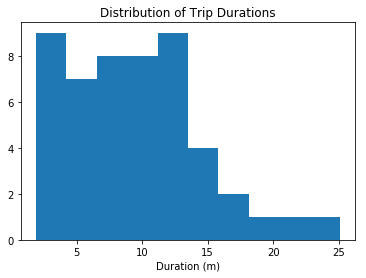

In [11]:
# load library
import matplotlib.pyplot as plt

# this is a 'magic word' that allows for plots to be displayed
# inline with the notebook. If you want to know more, see:
# http://ipython.readthedocs.io/en/stable/interactive/magics.html
%matplotlib inline 

# example histogram, data taken from bay area sample
data = [ 7.65,  8.92,  7.42,  5.50, 16.17,  4.20,  8.98,  9.62, 11.48, 14.33,
        19.02, 21.53,  3.90,  7.97,  2.62,  2.67,  3.08, 14.40, 12.90,  7.83,
        25.12,  8.30,  4.93, 12.43, 10.60,  6.17, 10.88,  4.78, 15.15,  3.53,
         9.43, 13.32, 11.72,  9.85,  5.22, 15.10,  3.95,  3.17,  8.78,  1.88,
         4.55, 12.68, 12.38,  9.78,  7.63,  6.45, 17.38, 11.90, 11.52,  8.63,]
plt.hist(data)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (m)')
plt.show()

In the above cell, we collected fifty trip times in a list, and passed this list as the first argument to the `.hist()` function. This function performs the computations and creates plotting objects for generating a histogram, but the plot is actually not rendered until the `.show()` function is executed. The `.title()` and `.xlabel()` functions provide some labeling for plot context.

You will now use these functions to create a histogram of the trip times for the city you selected in question 4c. Don't separate the Subscribers and Customers for now: just collect all of the trip times and plot them.

In [12]:
## Use this and additional cells to collect all of the trip times as a list ##
## and then use pyplot functions to generate a histogram of trip times.     ##

def duration (filename):
    """
    This function reads in a trip data file 
    and returns all duration data as a list
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
       
        # initialize count variable
        duration = []
        
        # tally up ride types
        for row in reader:
                duration.append(float(row['duration']))
                
    return duration


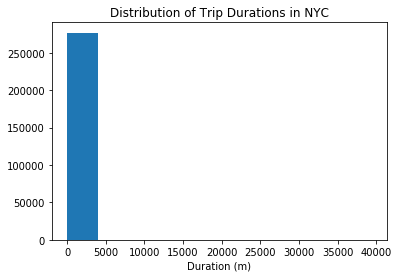

In [15]:
data_file = './data/NYC-2016-Summary.csv'
data = duration (data_file)
plt.hist(data)
plt.title('Distribution of Trip Durations in NYC')
plt.xlabel('Duration (m)')
plt.show()

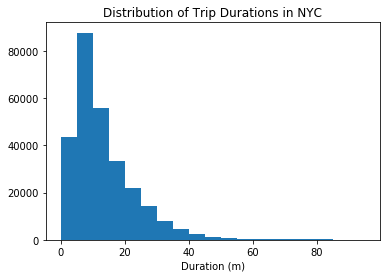

In [13]:

data_file = './data/NYC-2016-Summary.csv'
data = duration (data_file)

# to allow data from 0 to 100 minutes. 5 is the hist bin width 
bins = range(0,100,5)

plt.hist(data, bins)
plt.title('Distribution of Trip Durations in NYC')
plt.xlabel('Duration (m)')
plt.show()

If you followed the use of the `.hist()` and `.show()` functions exactly like in the example, you're probably looking at a plot that's completely unexpected. The plot consists of one extremely tall bar on the left, maybe a very short second bar, and a whole lot of empty space in the center and right. Take a look at the duration values on the x-axis. This suggests that there are some highly infrequent outliers in the data. Instead of reprocessing the data, you will use additional parameters with the `.hist()` function to limit the range of data that is plotted. Documentation for the function can be found [[here]](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist).

**Question 5**: Use the parameters of the `.hist()` function to plot the distribution of trip times for the Subscribers in your selected city. Do the same thing for only the Customers. Add limits to the plots so that only trips of duration less than 75 minutes are plotted. As a bonus, set the plots up so that bars are in five-minute wide intervals. For each group, where is the peak of each distribution? How would you describe the shape of each distribution?

**Answer**: 

For Customers group, the peak of distribution is at 5 minutes and for Subscribers group, it is at 20 minutes.

Distribution of Trip Duration for both types of users is **right skewed**, however, Customers distribution **has a right tail longer** than of the Subscribers distribution, hence it is more skewed to the right.


In [14]:
## Use this and additional cells to answer Question 5. ##
def duration_user_type (filename):
    """
    This function reads in a trip data file and returns duration data
    for Subscribers and Customers separately.
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
       
        # initialize count variable
        duration_subscribers = []
        duration_customers = []
        
        # tally up ride types
        for row in reader:
               
            if row['user_type'] == 'Subscriber':
                duration_subscribers.append(float(row['duration']))
            else:
                duration_customers.append(float(row['duration']))
                
    return duration_subscribers, duration_customers


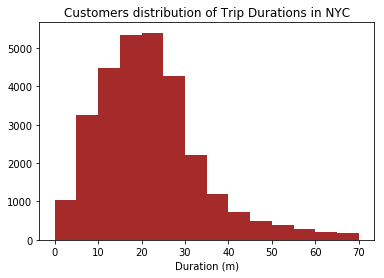

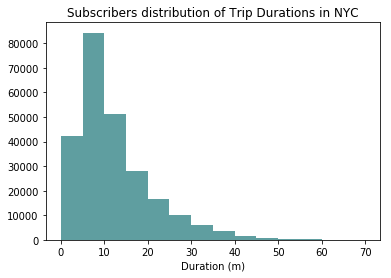

In [36]:
data_file = './data/NYC-2016-Summary.csv'
sdata, cdata = duration_user_type (data_file)

# to allow data from 0 to 75 minnutes, 5 is the hist bin width 
bins = range(0,75,5)
        
plt.hist(cdata, bins, color='brown')
plt.title('Customers distribution of Trip Durations in NYC')
plt.xlabel('Duration (m)')
plt.show()

plt.hist(sdata, bins, color='cadetblue')
plt.title('Subscribers distribution of Trip Durations in NYC')
plt.xlabel('Duration (m)')
plt.show()

<a id='eda_continued'></a>
## Performing Your Own Analysis

So far, you've performed an initial exploration into the data available. You have compared the relative volume of trips made between three U.S. cities and the ratio of trips made by Subscribers and Customers. For one of these cities, you have investigated differences between Subscribers and Customers in terms of how long a typical trip lasts. Now it is your turn to continue the exploration in a direction that you choose. Here are a few suggestions for questions to explore:

- How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?
- Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?
- During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

If any of the questions you posed in your answer to question 1 align with the bullet points above, this is a good opportunity to investigate one of them. As part of your investigation, you will need to create a visualization. If you want to create something other than a histogram, then you might want to consult the [Pyplot documentation](https://matplotlib.org/devdocs/api/pyplot_summary.html). In particular, if you are plotting values across a categorical variable (e.g. city, user type), a bar chart will be useful. The [documentation page for `.bar()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) includes links at the bottom of the page with examples for you to build off of for your own use.

**Question 6**: Continue the investigation by exploring another question that could be answered by the data available. Document the question you want to explore below. Your investigation should involve at least two variables and should compare at least two groups. You should also use at least one visualization as part of your explorations.

**Answer**: 

**6.1. How does ridership differ by month or season? Which month / season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month or season?**

For NYC city:

Riderchip differs from one month/season to another, when we observe the highest ridership in summer(1) season, specially in September. The ratio of subscriber trips to customer trips is larger in fall and winter seasons than in summer and spring. This is due to several reasons, including the following:
a. Because subscribers are mostly the residents of the city and use bike-sharing system for their different displacements.
b. In summer (even in spring) the tourism is active by residents and visitors.


**6.2. Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?**

For NYC city:

In the daily visulazations, ridership is higer in the weekends compared to weekdays.
Subscribers use bike-sharing system more in the week days than in the weekends, while custumers do the opposite.
Yes, the average duration of rides change depending on the day of the week. It is higher on the weekends by 2 to 3.5 minutes compared to the average in the weekdays.

**6.3. During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?**

For NYC city:

In the houlerly ridership bar charts, we observe two time areas in which the system is used the most. The first time area involves the hours **7h, 8h and 9h** while the second area involves the hours **16h, 17h, 18h and 19h**. It is clear that these time areas represent the **rush hours**. 
Yes, there is a difference in system usage for the two user type. From subscribers ridership bar chart, the system usage by subscribers reaches the peak at rush hours. 
From customers ridership bar chart, we observe a very low ridership in the morning rush hour. Ridership starts rising from the **11h until 15h**, to come back down again. 

**6.4. how many stations were used in each city:**
To answer to this question, I added addtional filesnames (star_id, end_id trip station) to our data file. see **time_of_trip** function.

Used stations number in NYC is 647.
In NYC, the proportion of trips starting from and ending at the same station is 1.9%.
In NYC, the proportion of trips starting from one station and ending at another is 98.1%.

Used stations number in Chicago is 559.
In Chicago, the proportion of trips starting from and ending at the same station is 3.4%.
In Chicago, the proportion of trips starting from one station and ending at another is 96.6%.

Used stations number in Washington is 420.
In Washington, the proportion of trips starting from and ending at the same station is 3.6%.
In Washington, the proportion of trips starting from one station and ending at another is 96.4%.


**6.5. what is the most used station in NYC:**

In NYC, the most used station is station_id:519. It is used 5945 times in 2016

Refer to **POSING QUESTION** section:

I asked about How many bikes must be available at the docks for each city, to ensure continuous service and to not make more bikes available than necessary?
Knowing the average trips duration, the number of trips in day/month/season can help here.

I asked if it would be profitable to offer a lower trip price to the registered users in a given city?
The ratio of subscribers to customers trips can answer this question widely. The sum of subscribers trips duration is bigger than of customers.


**6.1.a** In the following cells, we aim to answer the following questions: How does ridership differ by month/season? Which month/season has the highest ridership? Does the ratio of Subscriber trips to Customer trips change depending on the month/season ?

In [15]:
## Use this and additional cells to continue to explore the dataset. ##
## Once you have performed your exploration, document your findings  ##
## in the Markdown cell above.                                       ##
def month_ridership(filename):
    """
    This function takes data from the specified input file and compute
    the total ridership, subscribers ridership, customers ridership and 
    the ratio of subscribers ridership to customers ridership for each
    month in the data and puts them in a dictionary.
    """
    city = filename.split('-')[0].split('/')[-1]
    
    with open(filename, 'r') as f_in:
     
    
        # set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        
        # set up a dictionary to hold ridership for each month 
        month_ridership= {}
                
        # collect data from and process each row
        for row in trip_reader:
                
                if row['month'] in  month_ridership:
                    # increment total number of trips by 1
                    n = int(month_ridership[row['month']]['n_trips'])
                    month_ridership[row['month']]['n_trips'] = n + 1
                   
                    if row['user_type'] == 'Subscriber':
                        # increment subscribers number of trips by 1
                        n = int(month_ridership[row['month']]['n_subs_trips'])
                        month_ridership[row['month']]['n_subs_trips'] = n + 1
                    else:
                        # increment customers number of trips by 1
                        n = int(month_ridership[row['month']]['n_cust_trips'])
                        month_ridership[row['month']]['n_cust_trips'] = n + 1
                        
                else:
                    # initialize nested dictionary for the month in row['month'] 
                    month_ridership[row['month']]={}
                    month_ridership[row['month']]['n_trips'] = 1
                    
                    if row['user_type'] == 'Subscriber':
                        month_ridership[row['month']]['n_subs_trips'] = 1
                        
                        # set at 0 for thzt if the next month the user is customer
                        # we can increment this value in the above external "if"  bloc
                        month_ridership[row['month']]['n_cust_trips']   = 0
                    else:
                        month_ridership[row['month']]['n_cust_trips'] = 1
   
                        # set at 0 for thzt if the next month the user is customer
                        # we can increment this value in the above external "if"  bloc
                        month_ridership[row['month']]['n_subs_trips'] = 0
                    
                        
    for k in month_ridership:
        # compute the ratio for each month
        month_ridership[k]['subs_cust_ratio'] = round(month_ridership[k]['n_subs_trips']/month_ridership[k]['n_cust_trips'],1)
    return month_ridership

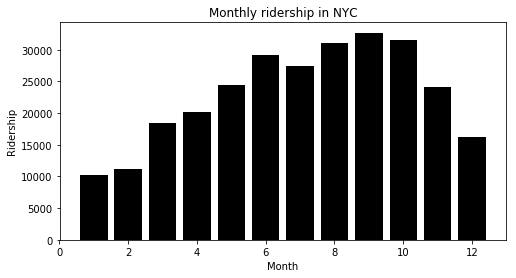

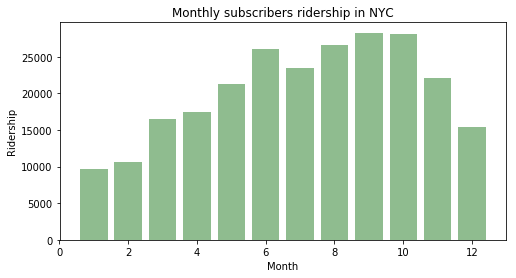

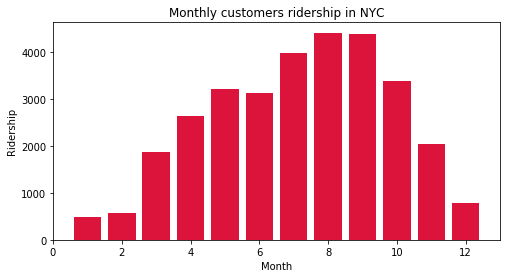

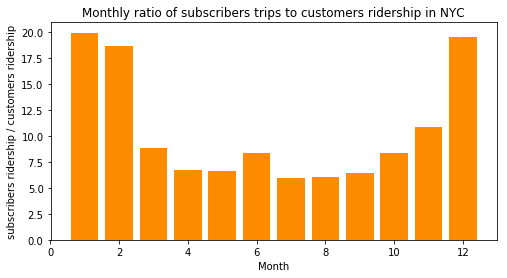

In [23]:
# In this cell we plot data in the month_ridership dictionnary

data_file = './data/NYC-2016-Summary.csv'
city = data_file.split('-')[0].split('/')[-1]
data=month_ridership(data_file)


l1,l2,l3,l4 = [],[],[],[]
keys = []

for k in data:
    # the best is to get keys (months) automaticly
    keys.append(int(k))

    l1.append(float(data[k]['n_trips']))
    l2.append(float(data[k]['n_subs_trips']))
    l3.append(float(data[k]['n_cust_trips']))
    l4.append(float(data[k]['subs_cust_ratio']))
#pprint(data)

plt.figure(figsize=(8,4)) # to give more dimensions to the plot.
plt.bar(keys,l1,color='black', align='center')
plt.title('Monthly ridership in {}'.format(city))
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.show()   

plt.figure(figsize=(8,4)) # to give more dimensions to the plot.
plt.bar(keys,l2,color='darkseagreen', align='center')
plt.title('Monthly subscribers ridership in {}'.format(city))
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.show()

plt.figure(figsize=(8,4)) # to give more dimensions to the plot.
plt.bar(keys,l3,color='crimson', align='center')
plt.title('Monthly customers ridership in {}'.format(city))
plt.xlabel('Month')
plt.ylabel('Ridership')
plt.show()     

plt.figure(figsize=(8,4)) # to give more dimensions to the plot.
plt.bar(keys,l4,color='darkorange', align='center')
plt.title('Monthly ratio of subscribers trips to customers ridership in {}'.format(city))
plt.xlabel('Month')
plt.ylabel('subscribers ridership / customers ridership')
plt.show()    



**6.1.b** I thought that the bar charts by season will be more informative. For this I searched on the stackoverflow.com a function that transforms a date to a season, and I get the **season** function below:

In [24]:
def season(month, day, HEMISPHERE):
    """    
    This function takes month and day number and the HEMISPHERE
    and returns the corresponding season.
    
    Input: 
    month: int. (1-12)
    day:int. (1-31)
    HEMISPHERE: str. 'north' or 'south'.
    because seasons in the northern and southern hemispheres are not 
    the same, this input is used to give you the correct seasons given
    a data, whether you are in the northern or southern hemisphere.
    for more information about this topic see:
    (https://www.soest.hawaii.edu/GG/ASK/seasons.html)
    output: s:int. 0: spring. 1: summer. 2: fall. 3:winter.
    """
    md = month * 100 + day

    if ((md > 320) and (md < 621)):
        s = 0 #spring
    elif ((md > 620) and (md < 923)):
        s = 1 #summer
    elif ((md > 922) and (md < 1223)):
        s = 2 #fall
    else:
        s = 3 #winter

    if not HEMISPHERE == 'north':
        s = (s + 2) % 3
    return s

In [25]:
def season_ridership(filename,HEMISPHERE):
    """
    This function takes the hemisphere to which the city belongs and 
    data from the specified input file and compute the total ridership,
    subscribers ridership, customers ridership and the ratio of subscribers 
    ridership to customers ridership for each season in the data and puts 
    them in a dictionary.
    """
    city = filename.split('-')[0].split('/')[-1]
    
    with open(filename, 'r') as f_in:
     
    
        # set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        
        # set up a dictionary to hold ridership each season 
        season_ridership = {}
                
        # collect data from and process each row
        for row in trip_reader:
                # call season function to get season for month+day
                s = season(int(row['month']), int(row['day']), HEMISPHERE)
                
                if s in  season_ridership:
                    n = int(season_ridership[s]['n_trips'])
                    season_ridership[s]['n_trips'] = n + 1
                   
                    if row['user_type'] == 'Subscriber':

                        n = int(season_ridership[s]['n_subs_trips'])
                        season_ridership[s]['n_subs_trips'] = n + 1
                    else:
                        n = int(season_ridership[s]['n_cust_trips'])
                        season_ridership[s]['n_cust_trips'] = n + 1
                        
                else:
                    season_ridership[s]={}
                    season_ridership[s]['n_trips'] = 1
                    if row['user_type'] == 'Subscriber':
                        season_ridership[s]['n_subs_trips'] = 1

                        season_ridership[s]['n_cust_trips']   = 0
                    else:
                        season_ridership[s]['n_cust_trips'] = 1
   
                        season_ridership[s]['n_subs_trips'] = 0
                    
                        
    for k in season_ridership:
        season_ridership[k]['subs_cust_ratio'] = round(season_ridership[k]['n_subs_trips']/season_ridership[k]['n_cust_trips'],1)
    return season_ridership

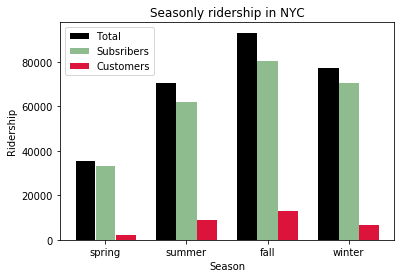

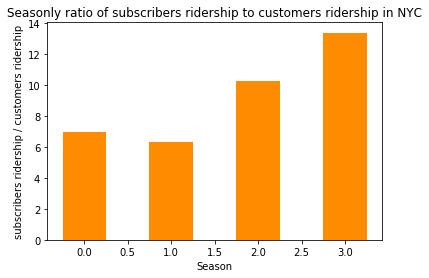

In [26]:
# In this cell we plot data in the season_ridership dictionnary
import numpy as np

data_file = './data/NYC-2016-SummaryA.csv'
city = data_file.split('-')[0].split('/')[-1]
data=season_ridership(data_file,'north')

l1,l2,l3,l4 = [],[],[],[]
keys = []

for k in data:
    keys.append(int(k))

    l1.append(float(data[k]['n_trips']))
    l2.append(float(data[k]['n_subs_trips']))
    l3.append(float(data[k]['n_cust_trips']))
    l4.append(float(data[k]['subs_cust_ratio']))
    
# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(l1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
plt.bar(r1, l1, color='black', width=barWidth, edgecolor='white', label='Total')
plt.bar(r2, l2, color='darkseagreen', width=barWidth, edgecolor='white', label='Subsribers')
plt.bar(r3, l3, color='crimson', width=barWidth, edgecolor='white', label='Customers')

# Add xticks on the middle of the group bars
plt.xlabel('Season')
plt.ylabel('Ridership')
plt.xticks([r + barWidth for r in range(len(l1))], ['spring', 'summer','fall','winter'])
plt.title('Seasonly ridership in {}'.format(city)) 
# Create legend & Show graphic
plt.legend()
plt.show()

plt.bar(keys,l4, color='darkorange', width=0.5, align='center')
plt.title('Seasonly ratio of subscribers ridership to customers ridership in {}'.format(city))
plt.xlabel('Season')
plt.ylabel('subscribers ridership / customers ridership')
plt.show()    

**6.2** In the following cells, we aim to answer the following questions:
Is the pattern of ridership different on the weekends versus weekdays? On what days are Subscribers most likely to use the system? What about Customers? Does the average duration of rides change depending on the day of the week?

In [27]:
def day_ridership(filename):
    """
    This function takes data from the specified input file and compute the 
    for each weekday the following values:
    1- the trip average duration  : day_ridership['day']['ave_duration']
    2- the ridership: day_ridership['day']['n_trips']
    3- the trip average duration for subsribers  : day_ridership['day']['subs_ave_duration']
    4- the ridership for subsribers: day_ridership['day']['ns_trips']
    5- the trip average duration for customers  : day_ridership['day']['cust_ave_duration']
    6- the ridership for customers: day_ridership['day']['nc_trips']
    7- the ratio of subscribers ridership to customers ridership : day_ridership['day']['subs_cust_ratio']
    """
    city = filename.split('-')[0].split('/')[-1]
    with open(filename, 'r') as f_in:
     
    
        # set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        
        # set up a dictionary to hold ridership for each month 
        day_ridership= {}
                
        # collect data from and process each row
        for row in trip_reader:
                
                if row['day_of_week'] in  day_ridership:
                    n = int(day_ridership[row['day_of_week']]['n_trips'])
                    day_ridership[row['day_of_week']]['n_trips'] = n + 1
                    S = float(day_ridership[row['day_of_week']]['ave_duration'])
                    day_ridership[row['day_of_week']]['ave_duration'] = S + float(row['duration'])
                   
                    if row['user_type'] == 'Subscriber':

                        n = int(day_ridership[row['day_of_week']]['n_subs_trips'])
                        day_ridership[row['day_of_week']]['n_subs_trips'] = n + 1
                        S = float(day_ridership[row['day_of_week']]['subs_ave_duration'])
                        day_ridership[row['day_of_week']]['subs_ave_duration'] = S + float(row['duration'])
                    else:
                        n = int(day_ridership[row['day_of_week']]['n_cust_trips'])
                        day_ridership[row['day_of_week']]['n_cust_trips'] = n + 1
                        S = float(day_ridership[row['day_of_week']]['cust_ave_duration'])
                        day_ridership[row['day_of_week']]['cust_ave_duration'] = S + float(row['duration'])
                        
                else:
                    day_ridership[row['day_of_week']]={}
                    day_ridership[row['day_of_week']]['n_trips'] = 1
                    day_ridership[row['day_of_week']]['ave_duration'] =  float(row['duration'])
                    if row['user_type'] == 'Subscriber':
                        day_ridership[row['day_of_week']]['n_subs_trips'] = 1
                        day_ridership[row['day_of_week']]['subs_ave_duration'] = float(row['duration'])

                        day_ridership[row['day_of_week']]['n_cust_trips']   = 0
                        day_ridership[row['day_of_week']]['cust_ave_duration'] = 0
                    else:
                        day_ridership[row['day_of_week']]['n_cust_trips'] = 1
                        day_ridership[row['day_of_week']]['cust_ave_duration'] = float(row['duration'])
   
                        day_ridership[row['day_of_week']]['n_subs_trips'] = 0
                        day_ridership[row['day_of_week']]['subs_ave_duration'] = 0
                    
                        
    for k in day_ridership:
        day_ridership[k]['ave_duration'] = round(day_ridership[k]['ave_duration']/day_ridership[k]['n_trips'],1)
        day_ridership[k]['cust_ave_duration'] = round(day_ridership[k]['cust_ave_duration']/day_ridership[k]['n_cust_trips'],1)
        day_ridership[k]['subs_ave_duration'] = round(day_ridership[k]['subs_ave_duration']/day_ridership[k]['n_subs_trips'],1)
        
        day_ridership[k]['subs_cust_ratio'] = round(day_ridership[k]['n_subs_trips']/day_ridership[k]['n_cust_trips'],1)
    return day_ridership

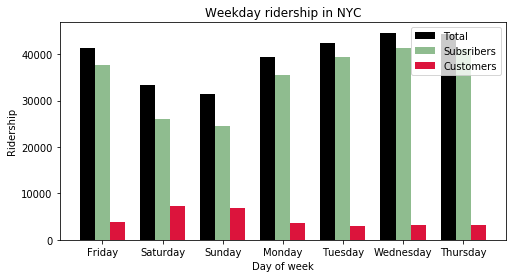

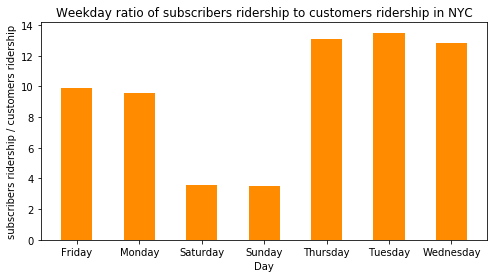

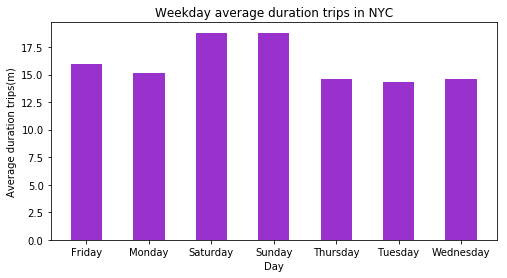

In [28]:
# In this cell we plot data in the day_ridership dictionnary
import numpy as np

data_file = './data/NYC-2016-SummaryA.csv'
city = data_file.split('-')[0].split('/')[-1]
data=day_ridership(data_file)

l1,l2,l3,l4,l5 = [],[],[],[],[]
keys = []

for k in data:
    keys.append((k))

    l1.append(float(data[k]['n_trips']))
    l2.append(float(data[k]['n_subs_trips']))
    l3.append(float(data[k]['n_cust_trips']))
    l4.append(float(data[k]['subs_cust_ratio']))
    l5.append(float(data[k]['ave_duration']))


# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(l1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
plt.figure(figsize=(8,4))
# Make the plot
plt.bar(r1, l1, color='black', width=barWidth, label='Total')
plt.bar(r2, l2, color='darkseagreen', width=barWidth, label='Subsribers')
plt.bar(r3, l3, color='crimson', width=barWidth, label='Customers')

# Add xticks on the middle of the group bars
plt.xlabel('Day of week')
plt.ylabel('Ridership')
plt.xticks([r + barWidth for r in range(len(l1))], keys)
plt.title('Weekday ridership in {}'.format(city)) 
# Create legend & Show graphic
plt.legend(loc='best')
plt.show()

plt.figure(figsize=(8,4))
plt.bar(keys,l4, color='darkorange', width=0.5, align='center')
plt.title('Weekday ratio of subscribers ridership to customers ridership in {}'.format(city))
plt.xlabel('Day')
plt.ylabel('subscribers ridership / customers ridership')
plt.show()   

plt.figure(figsize=(8,4))
plt.bar(keys,l5, color='darkorchid', width=0.5, align='center')
plt.title('Weekday average duration trips in {}'.format(city))
plt.xlabel('Day')
plt.ylabel('Average duration trips(m)')
plt.show() 


**6.3** Cells below are used to answer to the following questions:
During what time of day is the system used the most? Is there a difference in usage patterns for Subscribers and Customers?

In [19]:
def hour_ridership(filename):
    """
    This function takes data from the specified input file and compute the 
    for each hour in a day the following values:
    1- the trip average duration  : hour_ridership['hour']['ave_duration']
    2- the ridership: hour_ridership['hour']['n_trips']
    3- the trip average duration for subsribers  : hour_ridership['hour']['subs_ave_duration']
    4- the ridership for subsribers: hour_ridership['hour']['ns_trips']
    5- the trip average duration for customers  : hour_ridership['hour']['cust_ave_duration']
    6- the ridership for customers: hour_ridership['hour']['nc_trips']
    7- the ratio of subscribers ridership to customers ridership : hour_ridership['hour']['subs_cust_ratio']
    """
    city = filename.split('-')[0].split('/')[-1]
    
    with open(filename, 'r') as f_in:
     
    
        # set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        
        # set up a dictionary to hold ridership for each month 
        hour_ridership= {}
                
        # collect data from and process each row
        for row in trip_reader:
                
                if row['hour'] in  hour_ridership:
                    n = int(hour_ridership[row['hour']]['n_trips'])
                    hour_ridership[row['hour']]['n_trips'] = n + 1
                   
                    if row['user_type'] == 'Subscriber':

                        n = int(hour_ridership[row['hour']]['n_subs_trips'])
                        hour_ridership[row['hour']]['n_subs_trips'] = n + 1
                    else:
                        n = int(hour_ridership[row['hour']]['n_cust_trips'])
                        hour_ridership[row['hour']]['n_cust_trips'] = n + 1
                        
                else:
                    hour_ridership[row['hour']]={}
                    hour_ridership[row['hour']]['n_trips'] = 1
                    if row['user_type'] == 'Subscriber':
                        hour_ridership[row['hour']]['n_subs_trips'] = 1

                        hour_ridership[row['hour']]['n_cust_trips']   = 0
                    else:
                        hour_ridership[row['hour']]['n_cust_trips'] = 1
   
                        hour_ridership[row['hour']]['n_subs_trips'] = 0
                    
                        
    for k in hour_ridership:
        hour_ridership[k]['subs_cust_ratio'] = round(hour_ridership[k]['n_subs_trips']/hour_ridership[k]['n_cust_trips'],1)
    return hour_ridership

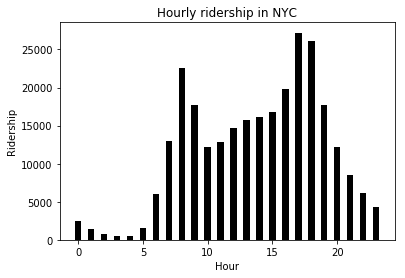

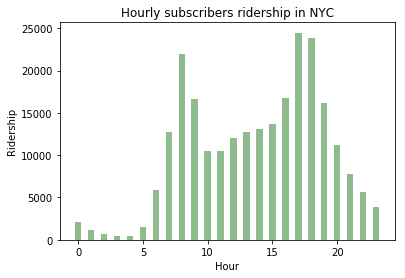

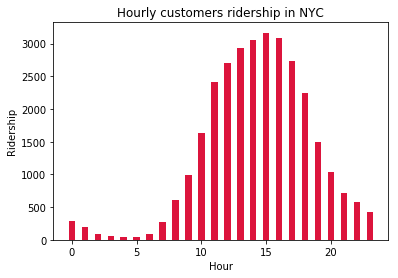

In [30]:
# In this cell we plot data in the hour_ridership dictionnary
data_file = './data/NYC-2016-SummaryA.csv'
city = data_file.split('-')[0].split('/')[-1]
data=hour_ridership(data_file)

l1,l2,l3,l4 = [],[],[],[]
keys = []

for k in data:
    keys.append(int(k))

    l1.append(float(data[k]['n_trips']))
    l2.append(float(data[k]['n_subs_trips']))
    l3.append(float(data[k]['n_cust_trips']))
    l4.append(float(data[k]['subs_cust_ratio']))
    # l5.append(float(data[k]['ave_duration']))
# pprint(keys)

plt.bar(keys,l1, color='black', width=0.5, align='center')
plt.title('Hourly ridership in {}'.format(city))
plt.xlabel('Hour')
plt.ylabel('Ridership')
plt.show()     

plt.bar(keys,l2, color='darkseagreen', width=0.5, align='center')
plt.title('Hourly subscribers ridership in {}'.format(city))
plt.xlabel('Hour')
plt.ylabel('Ridership')
plt.show()

plt.bar(keys,l3, color='crimson', width=0.5, align='center')
plt.title('Hourly customers ridership in {}'.format(city))
plt.xlabel('Hour')
plt.ylabel('Ridership')
plt.show()     



**6.4** In the followings cells, we try to know about bikes stations in each city

In [31]:
def ride_station(filename):
    """
    This function reads in a trip data file and return the number of
    stations used in the given city, the propostion of trips that 
    starts and ands at the same station and the propostion of trips
    that starts at one station and ends in another .
    """
    with open(filename, 'r') as f_in:
        # set up csv reader object
        reader = csv.DictReader(f_in)
         
        
        # initialize count variables
        n_same_id = 0
        n_diff_id = 0
        station_ids = set()
        
        # tally up ride types
        for row in reader:
            station_ids.add(row['start_id'])
            station_ids.add(row['end_id'])
            if row['start_id'] == row['end_id']:
                n_same_id += 1
            else:
                n_diff_id += 1
        
        # compute total number of rides
        n_total = n_same_id + n_diff_id
        
        # return tallies as a tuple
        return(round(n_same_id*100/n_total,1), round(n_diff_id*100/n_total,1), len(station_ids))

In [32]:
data_file = ['./data/NYC-2016-SummaryA.csv','./data/Chicago-2016-SummaryA.csv','./data/Washington-2016-SummaryA.csv']
for file in data_file:
    city = file.split('-')[0].split('/')[-1]
    data=ride_station(file)
    print('Used stations number in {} is {}.'.format(city,data[2]))
    print('In {}, the proportion of trips starting from and ending at the same station is {}%.'.format(city, data[0]))
    print('In {}, the proportion of trips starting from one station and ending at another is {}%.\n'.format(city, data[1]))

Used stations number in NYC is 647.
In NYC, the proportion of trips starting from and ending at the same station is 1.9%.
In NYC, the proportion of trips starting from one station and ending at another is 98.1%.

Used stations number in Chicago is 559.
In Chicago, the proportion of trips starting from and ending at the same station is 3.4%.
In Chicago, the proportion of trips starting from one station and ending at another is 96.6%.

Used stations number in Washington is 420.
In Washington, the proportion of trips starting from and ending at the same station is 3.6%.
In Washington, the proportion of trips starting from one station and ending at another is 96.4%.



**6.5** In the following cells, we will know which station is mostly used in a given city.

In [33]:
def most_used_station(filename):
    """
    This function takes data trips filename and returns the most used 
    satition id and how often has been used. 
    """
    city = filename.split('-')[0].split('/')[-1]
    
    with open(filename, 'r') as f_in:
         
        # set up csv DictReader object ##
        trip_reader = csv.DictReader(f_in)
        
        # set up a dictionary to hold stations id
        station_id = {}
   
        # collect data from and process each row
        for row in trip_reader:
                
                if row['start_id'] in  station_id:
                    station_id[row['start_id']] = int(station_id[row['start_id']]) +1
                else:
                    station_id[row['start_id']] = 1
                
                if row['end_id'] in  station_id:
                    station_id[row['end_id']] = int(station_id[row['end_id']]) +1
                else:
                    station_id[row['end_id']]= 1
        
    use_number =[]
    for ids in station_id:
        use_number.append(int(station_id[ids]))
    max_use_number= max(use_number)  

    
    for k in station_id:
        if int(station_id[k]) == max_use_number:
            station = k
            break
                  
    return station,max_use_number

In [36]:

data_file = './data/NYC-2016-SummaryA.csv'
city = data_file.split('-')[0].split('/')[-1]
year = data_file.split('-')[1]
station,max_use_number = most_used_station(data_file)
print('\n In {}, the most used station is station_id:{}. It is used {} times in {}'.format(city,station,max_use_number,year))


 In NYC, the most used station is station_id:519. It is used 5945 times in 2016


<a id='conclusions'></a>
## Conclusions

Congratulations on completing the project! This is only a sampling of the data analysis process: from generating questions, wrangling the data, and to exploring the data. Normally, at this point in the data analysis process, you might want to draw conclusions about the data by performing a statistical test or fitting the data to a model for making predictions. There are also a lot of potential analyses that could be performed on the data which are not possible with only the data provided. For example, detailed location data has not been investigated. Where are the most commonly used docks? What are the most common routes? As another example, weather has potential to have a large impact on daily ridership. How much is ridership impacted when there is rain or snow? Are subscribers or customers affected more by changes in weather?

**Question 7**: Putting the bike share data aside, think of a topic or field of interest where you would like to be able to apply the techniques of data science. What would you like to be able to learn from your chosen subject?

**Answer**: 

I will be interested to apply the techniques of data science on **hypermarket with branches**. I would like to be able to know about:

- The amount of sales made in different time periods; in weekdays, weekends, holidays, promotions days.
- The number of visitors and customers. The less/most crowded branch. The most profitable branch. The number of loyal customers in each branch.
- Select a group of top selling products (and a group of the least sold products) in a specific period.  
- The number of products still available. The products that will be expired in a given time.  Is the right moment to offer promotions? For which products?
- How do sales of a new product evolve? How do sales of a product of a new supplier evolve?
- How the nature pavilion grows? The number of customers who buy regularly organic products? The most popular organic products?
- I would like to make a comparison between sales of food and non-food products (textiles, furniture ..ect).
- I would like to visualize the total sales by product.
- Compare sales of two products of the same type from different suppliers.
- Compare total sales by branch, by branch area and by population in which the branches is installed.







> **Tip**: If we want to share the results of our analysis with others, we aren't limited to giving them a copy of the jupyter Notebook (.ipynb) file. We can also export the Notebook output in a form that can be opened even for those without Python installed. From the **File** menu in the upper left, go to the **Download as** submenu. You can then choose a different format that can be viewed more generally, such as HTML (.html) or
PDF (.pdf). You may need additional packages or software to perform these exports.

> If you are working on this project via the Project Notebook page in the classroom, you can also submit this project directly from the workspace. **Before you do that**, you should save an HTML copy of the completed project to the workspace by running the code cell below. If it worked correctly, the output code should be a 0, and if you click on the jupyter icon in the upper left, you should see your .html document in the workspace directory. Alternatively, you can download the .html copy of your report following the steps in the previous paragraph, then _upload_ the report to the directory (by clicking the jupyter icon).

> Either way, once you've gotten the .html report in your workspace, you can complete your submission by clicking on the "Submit Project" button to the lower-right hand side of the workspace.

In [9]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Bike_Share_Analysis.ipynb'])

0

In [ ]:
!tar chvfz notebook.tar.gz *

Bike_Share_Analysis.html
Bike_Share_Analysis.ipynb
data/
data/NYC-2016-SummaryA.csv
data/Chicago-Divvy-2016.csv
